# $M^2$ Measurements

**Scott Prahl**

**March 2020, version 2, still unfinished**

In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

def z_rayleigh(w0,lambda0):
    """
    Return the Rayleigh distance.
    Args:
        w0 : minimum beam radius [m]
        lambda0: wavelength of light [m]
    Returns:
        distance where irradiance drops by 1/2 [m]
    """
    return np.pi * w0**2/lambda0


def beam_radius(w0,z0,M2,lambda0,z):
    """
    Return the beam radius at an axial location.
    Args:
        w0 : minimum beam radius [m]
        z0 : axial location of beam waist [m]
        M2 : beam propagation factor [-]
        lambda0: wavelength of light [m]
        z : axial location of desired beam radius [m]
    Returns:
        Beam radius [m]
    """
    return w0*np.sqrt(1+(M2*(z-z0)/z_rayleigh(w0,lambda0))**2)

def focused_diameter(f,lambda0,d):
    """
    Return the diameter of diffraction-limited Gaussian beam.
     Args:
        f : focal length of lens [m]
        lambda0: wavelength of light [m]
        d : diameter of limiting aperture [m]
    Returns:
        Beam radius [m]
    """
    return 2*lambda0 * f / d

pixel_size_mm = 3.75/1000           # pixel size in mm for the camera



## Gaussian Beams Continued

### Rayleigh Length $z_R$

The Rayleigh length $z_R$ for a Gaussian beam is 

$$
z_R=\frac{\pi w_0^2}{\lambda}
$$

and is the distance from the beam waist to the point where the beam radius has increased by a factor of $\sqrt{2}$ (and therefore the area has doubled or the irradiance (power/area) has dropped 50%).

### Gaussian Beam Radius $w(z)$

It would seem that $w$ should stand for *width*, but it doesn't.  This means that $w$ is not the diameter but the radius.  Go figure.

The parameter $w$ is referred to as beam radius and depends on the location $z$ along the axis. At $z = z_0$ it reaches a minimum value $w_0$, called the beam waist. 

$$
w^2(z)=w_0^2\left(1+\frac{(z-z_0)^2}{z_R^2}\right)
$$

The beam waist $w_0$ and its location $z_0$ determine the beam size everywhere (assuming, of course, that the wavelength is known).

## $M^2$ or the beam propagation factor

It turns out that real beams differ from the behavior of a perfect Gaussian beam.  Specifically, they diverge more quickly or don't focus to the same size spot.

The beam propagation factor $M^2$ is a measure of how close a beam is to a Gaussian one.

### Beam radius with $M^2$ factor

The variation of the beam radius along the optical axis is given by

$$
w^2(z) = w_0^2\left[1 + \left(M^2\cdot\frac{z-z_0}{z_R} \right)^2\right]
$$

which is the same equation as above when $M^2=1$.

A Gaussian beam has $M=1$, while all other beams will have $M>1$.  Moreover,
* for a given *beam radius*, the Gaussian beam has the smallest possible beam divergence
* for a given *beam divergence*, the Gaussian beam has the smallest possible beam radius. 

We find that the multimode beam has a beam waist which is $M^2$ times larger than a fundamental Gaussian beam with the same beam divergence, or a beam divergence which is $M^2$ times larger than that of a fundamental Gaussian beam with the same beam waist.

### Elliptical Beams

For an elliptical beam, the Rayleigh distance will differ in each case (because the beam waists have different sizes).  Thus

$$
w_x^2(z) = w_{0x}^2\left[1 + \left(M_x^2\cdot\frac{z-z_0}{z_{Rx}} \right)^2\right]
$$

and

$$
w_y^2(z) = w_{0y}^2\left[1 + \left(M_y^2\cdot\frac{z-z_0}{z_{Ry}} \right)^2\right]
$$

and there will be different $M^2$ values on the major and minor axes of the elliptical beam shape.

## Beam Divergence $\theta$

The beam divergence is defined as

$$
\theta=\lim_{z\rightarrow\infty}\frac{w(z)}{z}
$$

For a Gaussian beam, $M^2=1$ 

$$
\theta_{gaussian}=\lim_{z\rightarrow\infty}\frac{w(z)}{ z}=\frac{w_0}{ z_R} = \frac{\lambda}{\pi w_0}
$$

Otherwise

$$
\theta_{actual}=\lim_{z\rightarrow\infty}\frac{w(z)}{ z}=M^2\frac{w_0}{ z_R} = M^2\frac{\lambda}{\pi w_0}
$$

and therefore $M^2$ represents how much more real beams diverge than pure Gaussian beams

$$
M^2 = \frac{\theta_{actual}}{\theta_{gaussian}}
$$

or

$$
\theta_{actual}= M^2 \theta_{gaussian}
$$

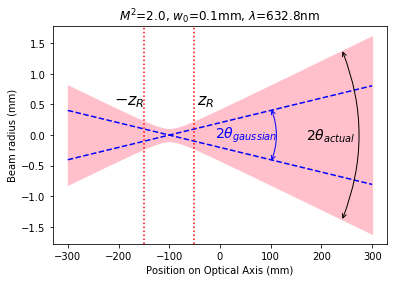

In [2]:
M2=2
w0=0.1                    # radius of beam waist [mm]
z0=-100                   # z-axis position of beam waist [mm]
lambda0=0.6328/1000       # again in mm
zR=z_rayleigh(w0,lambda0) # Rayleigh Distance

theta = w0/zR
z = np.linspace(-300,300,100)
plt.fill_between(z,-beam_radius(w0,z0,M2,lambda0,z),beam_radius(w0,z0,M2,lambda0,z),color='pink')

plt.plot(z,theta*(z-z0),'--b')
plt.plot(z,-theta*(z-z0),'--b')
plt.axvline(z0+zR, color='red', linestyle=':')
plt.axvline(z0-zR, color='red', linestyle=':')

plt.xlabel("Position on Optical Axis (mm)")
plt.ylabel("Beam radius (mm)")
plt.title("$M^2$=%.1f, $w_0$=%.1fmm, $\lambda$=%.1fnm"%(M2,w0,1e6*lambda0))

plt.text(0.9*(zR+z0),0.5,'$z_R$', fontsize=16)
plt.text(1.4*(-zR+z0),0.5, '$-z_R$', fontsize=16)

plt.text(-10, 0, r'$2\theta_{gaussian}$', fontsize=14,va='center',color='blue')
plt.annotate('',xy=(100,0.45),xytext=(100,-0.45),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->",color='blue'))

plt.text(170,0,r'$2\theta_{actual}$', fontsize=14,va='center')
plt.annotate('',xy=(240,1.4),xytext=(240,-1.4),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->"))
plt.show()

## Diffraction-Limited Beam

If the focal length of the focusing lens is $f$, then the wavelength and limiting aperture will determine the minimum diameter of focused beam.  For a Gaussian beam, the radius will be approximately
$$
w_0 = {1.44 \lambda f \over  d}
$$
where $d$ is the beam diameter at the lens (the lens diameter is usually much bigger than the beam and is not the limiting aperture). 


## Beam Parameter Product

Laser beam quality can be described by the beam parameter product (BPP) or

$$
\mathrm{BPP} = w_0 \theta =  M^2 \frac{\lambda}{\pi}
$$

This is not unlike the throughput parameter $T=A \Omega$ from radiometry which captures both the angular expansion of light and focusing into a single variable.  The BPP represents, for instance, the amount of light that can be coupled into a fiber.  For practical use of the BPP, see

Wang, [Fiber coupled diode laser beam parameter product calculation and rules for optimized design](https://www.researchgate.net/publication/253527159_Fiber_Coupled_Diode_Laser_Beam_Parameter_Product_Calculation_and_Rules_for_Optimized_Design), *Proc. SPIE*, **7918**, 9 (2011)

## Experimental Concerns

### Measure the beam at the right places along its path

The ISO 11146-1 document, [Lasers and laser-related equipment - Test methods for laser beam widths, divergence angles and beam propagation, Part 1: Stigmatic and simple astigmatic beams](https://www.iso.org/obp/ui/#iso:std:iso:11146:-1:ed-1:v1:en) gives specific instructions for how to measure the $M^2$ value.

> If the beam waist is accessible for direct measurement, the beam waist location, beam widths, divergence angles and beam propagation ratios shall be determined by a hyperbolic fit to different measurements of the beam width along the propagation axis $z$. Hence, measurements at at least 10 different $z$ positions shall be taken. Approximately half of the measurements shall be distributed within one Rayleigh length on either side of the beam waist, and approximately half of them shall be distributed beyond two Rayleigh lengths from the beam waist. For simple astigmatic beams this procedure shall be applied separately for both principal directions.

The Rayleigh distance is directly related the to focal length of the lens:

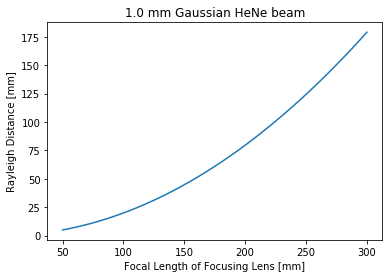

In [3]:
focal = np.linspace(50,300,100) #mm
d = 1 #mm
lambdaa = 632.8e-6 #mm

# expected radius for gaussian beam
w_gaussian = focused_diameter(focal,lambdaa,d)/2

plt.plot(focal,z_rayleigh(w_gaussian,lambdaa))
plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("Rayleigh Distance [mm]")
plt.title('%.1f mm Gaussian HeNe beam'%d)
plt.show()

### Make sure that the beam spot is large enough

The focal length $f$ of focusing lens will determine the minimum diameter of focused beam.  For a Gaussian beam, the radius will be

$$
w_0 = \frac{1.44 \lambda f }{  d}
$$

where $d$ is the beam diameter on the lens.  This spot size should cover a significant number of pixels.

Furthermore, to avoid spherical aberrations we would like to ensure that the f-number, defined as the lens focal length in mm divided by the beam diameter at the lens in mm is at least 10, and preferably over 20. see http://www-ferp.ucsd.edu/LASERLAB/TUTOR/m2.html

As can be seen below, for longer focal length lenses, this is not an issue.

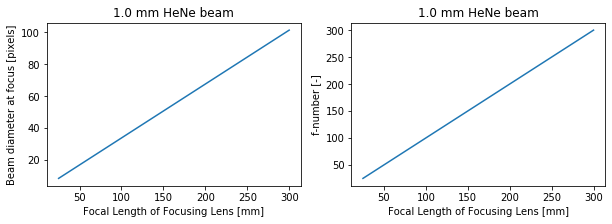

In [4]:
focal = np.linspace(25,300,100) #mm
d = 1 #mm
lambda0 = 632.8e-6 #mm

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(focal,focused_diameter(focal,lambda0,d)/pixel_size_mm)

plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("Beam diameter at focus [pixels]")
plt.title('%.1f mm HeNe beam'%d)

plt.subplot(1,2,2)
plt.plot(focal,focal/d)

plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("f-number [-]")
plt.title('%.1f mm HeNe beam'%d)

plt.show()

### Make sure that background is dark

Determining the center and diameter of an image with a lot of background is fraught with error.  Do what you can to minimize light on the camera sensor.  

### Make sure your camera sensor is not saturated

All bets are off when the measured beam is saturated.  There is no way to know if the maximum was 2, 10, or even 100 times as large as the measured values.